# Problem Statement

Rossmann is a European drug distributor which operates over 3,000 drug stores across seven European countries. Since a lot of drugs come with a short shelf life, that is, they do not have a long expiry date, it becomes imperative for Rossmann to accurately forecast sales at their individual stores. Currently, the forecasting is taken care of by the store managers who are tasked with forecasting daily sales for the next six weeks. 

## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

## Importing Data

In [2]:
# Data Reading
train = pd.read_csv("train.csv")
store = pd.read_csv("store.csv")

## Exploratory Data Analysis

In [3]:
# Checking sample data for train

train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
#Checking data size

train.shape

(1017209, 9)

In [5]:
#Checking data types of columns and null analysis

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 62.1+ MB


#### All data points are non-null and therefore do not require any imputation or further analysis

In [6]:
#Checking the spread of numerical columns

train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
# Checking sample data for store

store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
#Checking data size

store.shape

(1115, 10)

In [9]:
#Checking data types of columns and null analysis

store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 74.1+ KB


#### Store data has null values, we will need to impute them

In [10]:
# Checking % counts of null values

100*store.isnull().sum()/store.shape[0]

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

#### Absence of promo values would mean that there are no promotions running on the store, we can impute that with zero

In [11]:
store['Promo2SinceWeek'].fillna(0, inplace=True)
store['Promo2SinceYear'].fillna(0, inplace=True)
store['PromoInterval'].fillna(0, inplace=True)

#### CompetitionDistance field has insignificant no. of null values, we will impute it with its mean

In [12]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].mean(), inplace=True)

In [13]:
# Checking % counts of null values again

100*store.isnull().sum()/store.shape[0]

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.000000
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek               0.000000
Promo2SinceYear               0.000000
PromoInterval                 0.000000
dtype: float64

#### CompetitionOpenSinceMonth and CompetitionOpenSinceYear has null values, we will handle them later after further analysis.

# Data Analysis

In [14]:
# Creating function for plots

def CountPlot(features,df):
    cols=4
    rows = len(features)//cols +1
    fig = plt.figure(figsize=(16, rows*5))
    dataframe = df.copy()
    for plot, feature in enumerate(features):
        fig.add_subplot(rows,cols,plot+1)
        fig.tight_layout(h_pad=5, w_pad=5)
        dataframe[feature] = dataframe[feature].fillna('Missing')
        ax = sns.countplot(x=feature, data=dataframe,order = dataframe[feature].value_counts().index)
        plt.xticks(rotation = 90)
        plt.title("for {}".format(feature))
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}'.format(height/len(dataframe) * 100),
                    ha="center")

## Univariate Data Analysis on datasets

### For Store Data

In [15]:
# Store Data categorical fields

store_categorical_fields=['StoreType','Assortment','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

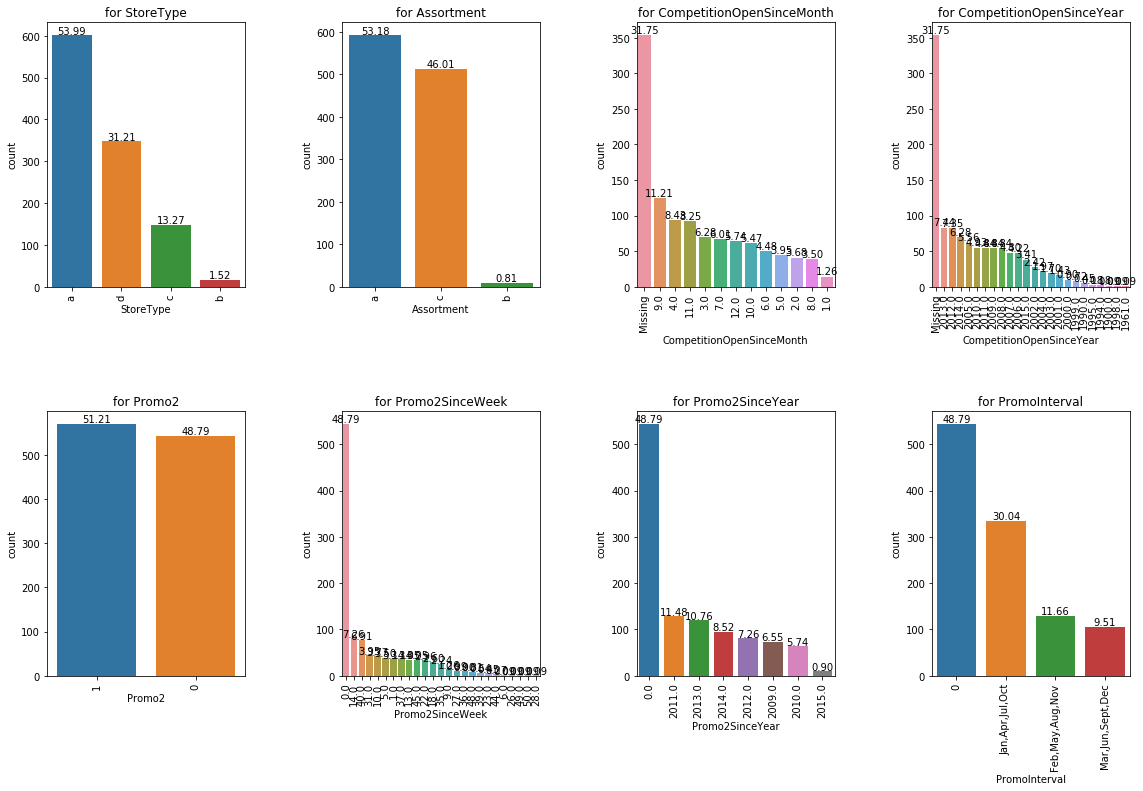

In [16]:
# Count plots for store data

CountPlot(store_categorical_fields,store)

### Inferences on store data

- Store Types:
  The majority of the stores, approximately 54%, belong to type A. This indicates that there are more stores categorized as type A compared to other types.

- Assortments:
  Most stores primarily offer type A assortments, with other assortment types being less common. This suggests that type A assortments are prevalent among the stores analyzed.

- Competition Data:
  For about 31% of the stores, there is no available data on competition. This could mean that either there is no significant competition in the vicinity of these stores, or the data regarding competition is missing or incomplete.

- Promotions:
  Nearly half of the stores, approximately 48%, do not participate in Promo2 promotions. This implies that a considerable portion of the stores does not engage in this type of promotional activity.

- Promotions tend to be concentrated in specific months, particularly January, April, July, and October. This suggests that these months are strategically chosen for promotional campaigns, possibly due to seasonal trends or other factors influencing consumer behavior.

- Overall, these insights provide valuable information about the distribution, assortment, competition, and promotional strategies across the stores analyzed.

### For Train Data

In [17]:
# Train Data categoric variables

train_categorical_fields=['DayOfWeek','Open', 'Promo', 'StateHoliday', 'SchoolHoliday']

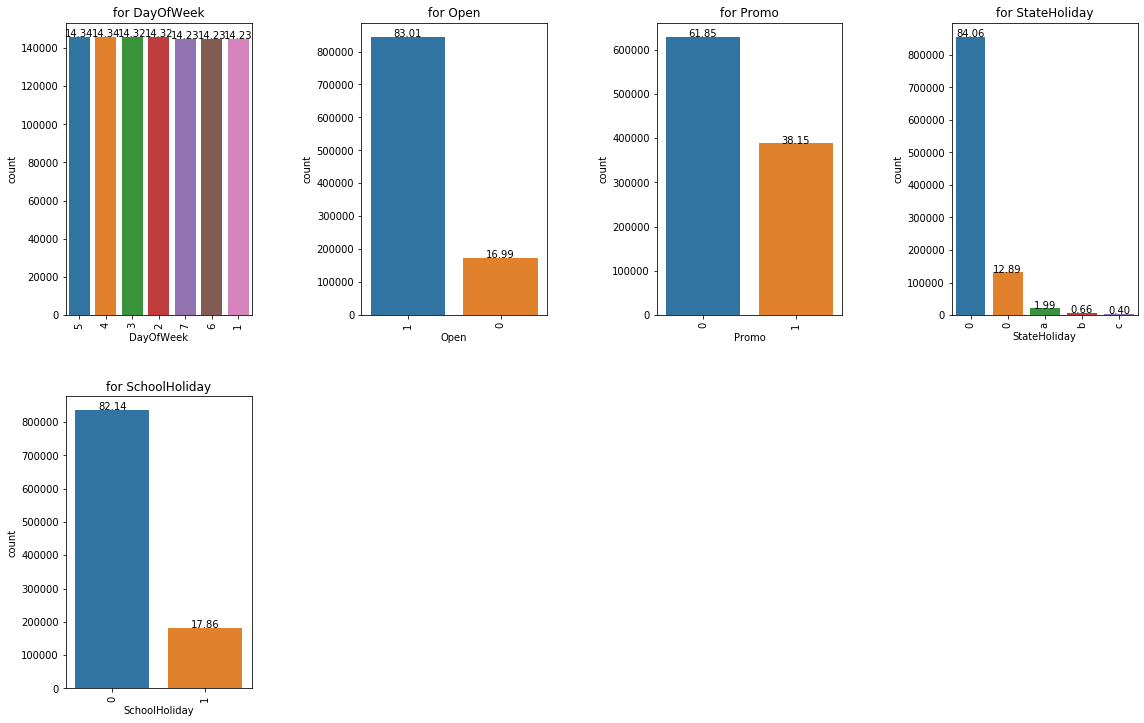

In [18]:
# Count plots for store data

CountPlot(train_categorical_fields,train)

### Inferences on train data

- Equal Contribution of Days of the Week:
  - This observation suggests that, across the dataset, there is relatively uniform activity among the days of the week. In other words, each day contributes equally to the overall dataset, indicating a consistent distribution of data points across the days of the week.
   - From a retail perspective, this could imply that sales, customer footfall, or other relevant metrics do not exhibit significant variations based on the day of the week. It could also suggest that the dataset is well-balanced in terms of sampling from different days.

- Store Closures:
  - The data indicates that stores are closed only for approximately 17% of the recorded instances. This means that the vast majority of the time, the stores are open and operational.
   - Store closures can occur due to various reasons such as public holidays, scheduled maintenance, or unforeseen circumstances like extreme weather conditions. Understanding the frequency and timing of closures can help businesses optimize staffing, inventory management, and customer service strategies.

- Promotional Activity:
  - Promotions are active on only about 38% of the recorded instances. This indicates that promotional activities, such as discounts, special offers, or marketing campaigns, are not consistently present across all the data points.
  - The relatively low percentage of promotional records suggests that promotions are not continuously running throughout the observation period. Instead, they may be strategically implemented during specific times or events to maximize their impact on sales and customer engagement.
  - Analyzing the timing and effectiveness of promotions can provide valuable insights into consumer behavior, competitive dynamics, and the overall marketing strategy of the stores.


# Box plot and outlier analysis on datasets

## For store data

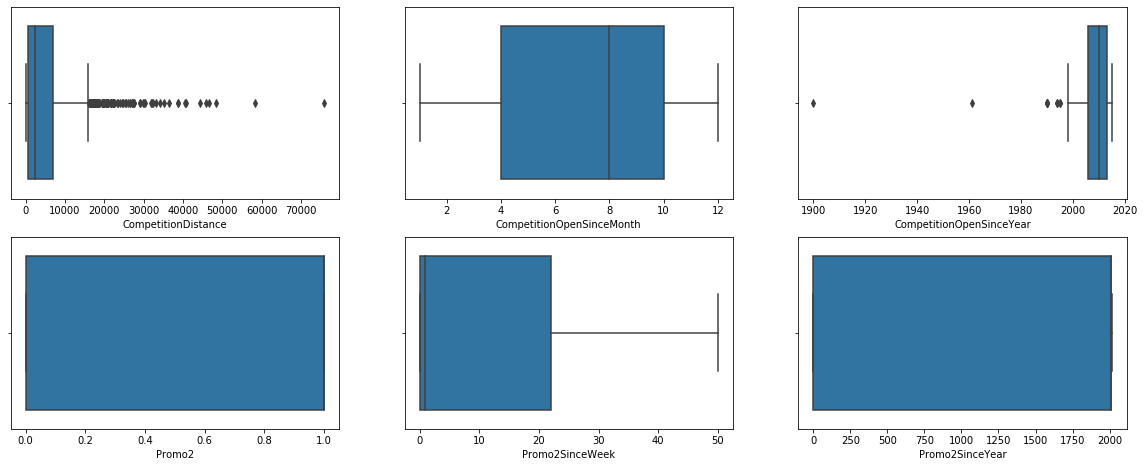

In [19]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'CompetitionDistance', data = store)
plt.subplot(3,3,2)
sns.boxplot(x = 'CompetitionOpenSinceMonth', data = store)
plt.subplot(3,3,3)
sns.boxplot(x = 'CompetitionOpenSinceYear',data = store)
plt.subplot(3,3,4)
sns.boxplot(x = 'Promo2', data = store)
plt.subplot(3,3,5)
sns.boxplot(x = 'Promo2SinceWeek', data = store)
plt.subplot(3,3,6)
sns.boxplot(x = 'Promo2SinceYear', data = store)
plt.show()

#### From the boxplots,we can see outliers in CompetitionDistance and CompetitionOpenSinceYear attributes. We will need to analyze them

#### For Competition distance, we would not need the values higher than the 99th percentile. We can cap the values having higher than 99th %ile to 99th %ile

In [20]:
# Capping values of CompetitionDistance to 99th %ile

store.loc[store.CompetitionDistance>store.CompetitionDistance.quantile(.99),'CompetitionDistance']=store.CompetitionDistance.quantile(.99)

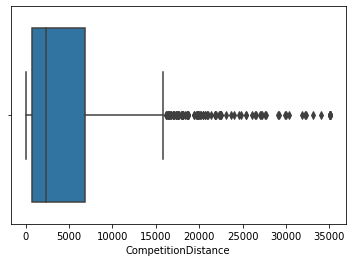

In [21]:
sns.boxplot(x = 'CompetitionDistance', data = store)
plt.show()

#### The distance values seem to be in considerable range now.


#### Checking for CompetitionOpenSinceYear

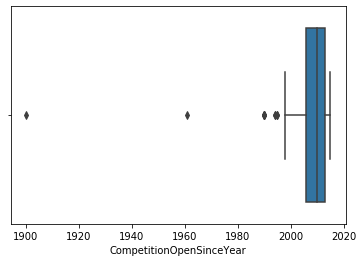

In [22]:
sns.boxplot(x = 'CompetitionOpenSinceYear',data = store)
plt.show()

In [23]:
store['CompetitionOpenSinceYear'].isnull().sum()

354

#### We can see CompetitionOpenSinceYear is null for 354 stores

In [24]:
#Checking the values of stores CompetitionDistance is null 

store.loc[store.CompetitionDistance.isnull(),['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Store']]

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Store


#### We can impute them with zero

In [25]:
store.loc[store.CompetitionDistance.isnull(),'CompetitionOpenSinceMonth']=0
store.loc[store.CompetitionDistance.isnull(),'CompetitionOpenSinceYear']=0
store.loc[store.CompetitionDistance.isnull(),'CompetitionDistance']=0

In [26]:
100*store.isnull().sum()/store.shape[0]

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.000000
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek               0.000000
Promo2SinceYear               0.000000
PromoInterval                 0.000000
dtype: float64

#### CompetitionOpenSinceMonth and CompetitionOpenSinceYear are null for 31% of stores, lets check their cases

In [27]:
store.loc[store.CompetitionOpenSinceMonth.isnull(),['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Store']]

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Store
11,1070.0,NaN,NaN,12
12,310.0,NaN,NaN,13
15,3270.0,NaN,NaN,16
18,3240.0,NaN,NaN,19
21,1040.0,NaN,NaN,22
...,...,...,...,...
1095,1130.0,NaN,NaN,1096
1099,540.0,NaN,NaN,1100
1112,9260.0,NaN,NaN,1113
1113,870.0,NaN,NaN,1114


In [28]:
store.loc[store.CompetitionOpenSinceYear.isnull(),['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Store']]

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Store
11,1070.0,NaN,NaN,12
12,310.0,NaN,NaN,13
15,3270.0,NaN,NaN,16
18,3240.0,NaN,NaN,19
21,1040.0,NaN,NaN,22
...,...,...,...,...
1095,1130.0,NaN,NaN,1096
1099,540.0,NaN,NaN,1100
1112,9260.0,NaN,NaN,1113
1113,870.0,NaN,NaN,1114


#### No data is available for competition store openings, let's impute them with zero

In [29]:
store.CompetitionOpenSinceYear.fillna(0,inplace=True)
store.CompetitionOpenSinceMonth.fillna(0,inplace=True)

In [30]:
# Checking null values

100*store.isnull().sum()/store.shape[0]

Store                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

# Merging the datasets

In [31]:
train = train.merge(right=store, on='Store', how='inner')

In [32]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [34]:
#Checking shape of the merged dataset

train.shape

(1017209, 18)

In [35]:
#Numerical descriptions

train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.311265e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.051528e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,3.510780e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


In [36]:
# Checking percentage of null records

100*train.isnull().sum()/train.shape[0]

Store                        0.0
DayOfWeek                    0.0
Date                         0.0
Sales                        0.0
Customers                    0.0
Open                         0.0
Promo                        0.0
StateHoliday                 0.0
SchoolHoliday                0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

#### We do not have any null values in the data

# Bivariate Analysis on Data

### Box Plot Analysis

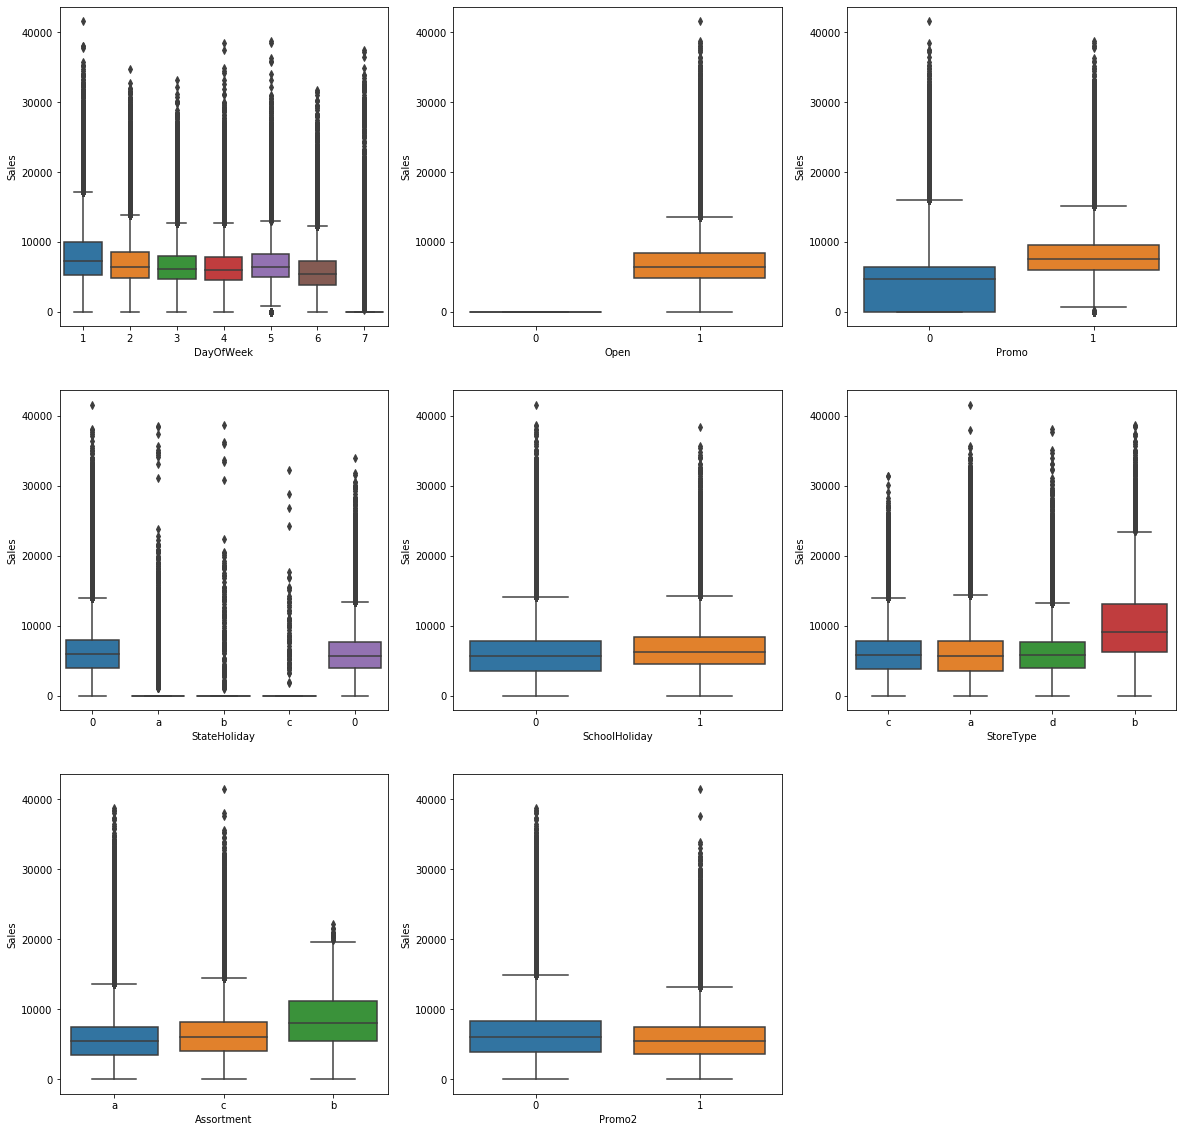

In [37]:
# Boxplots of attributes against Sales

plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'DayOfWeek', y = 'Sales', data = train)
plt.subplot(3,3,2)
sns.boxplot(x = 'Open', y = 'Sales', data = train)
plt.subplot(3,3,3)
sns.boxplot(x = 'Promo', y = 'Sales', data = train)
plt.subplot(3,3,4)
sns.boxplot(x = 'StateHoliday', y = 'Sales', data = train)
plt.subplot(3,3,5)
sns.boxplot(x = 'SchoolHoliday', y = 'Sales', data = train)
plt.subplot(3,3,6)
sns.boxplot(x = 'StoreType', y = 'Sales', data = train)
plt.subplot(3,3,7)
sns.boxplot(x = 'Assortment', y = 'Sales', data = train)
plt.subplot(3,3,8)
sns.boxplot(x = 'Promo2', y = 'Sales', data = train)
plt.show()

### Inferences on merged Data

- Sales Variation Across Weekdays:
   - Sales exhibit higher levels on the 1st, 2nd, and 5th weekdays, which typically correspond to Monday, Tuesday, and Friday. These days likely experience increased consumer activity, possibly due to the start of the workweek, midweek routines, and the anticipation of the weekend.
  - Conversely, sales are notably lower on the 7th weekday, which often corresponds to Sunday. This could be attributed to factors such as reduced store hours, cultural or religious practices that discourage shopping on Sundays, or simply a lower demand compared to other days of the week.

- Impact of Promotions on Sales:
   - Sales tend to be higher when promotional activities are active (i.e., when promotion is 1). This suggests that promotions effectively stimulate consumer interest and encourage purchases. Promotions could include discounts, special offers, or marketing campaigns aimed at attracting customers and driving sales.

- Effect of State Holidays on Sales:
  - Sales are observed to be lower on specific state holidays, labeled as a, b, and c. This indicates that these holidays negatively impact consumer spending patterns, possibly due to people engaging in other activities or traveling during these times.
  
- Impact of School Holidays on Sales:
  - Interestingly, school holidays do not appear to have a significant impact on sales. This suggests that despite children being out of school, consumer behavior and spending patterns remain relatively stable during school holidays. Other factors such as parental work schedules or family vacation plans may influence this trend.

- Sales Variation Across Store Types:
  - Stores categorized as type B demonstrate a higher percentage of sales compared to other store types. This suggests that there are distinguishing factors or characteristics associated with type B stores that attract more customers or generate higher sales volumes. These factors could include location, product assortment, store layout, or marketing strategies specific to type B stores.

- Impact of Assortment Types on Sales:
  - Assortment type B appears to correlate with higher sales figures. This indicates that products categorized under assortment type B may be more popular or in-demand among customers, leading to increased sales performance.

### Scatter Plot Analysis

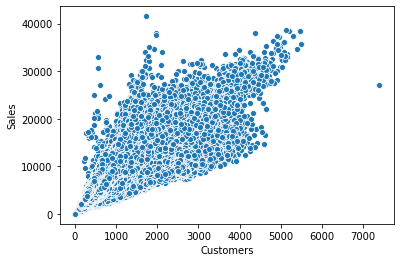

In [38]:
# Boxplots of Customers against Sales

sns.scatterplot(x = 'Customers', y = 'Sales', data = train)
plt.show()

#### Increase in no. of customers correlates an increase in sales

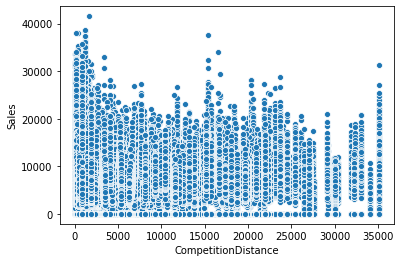

In [39]:
# Boxplots of Customers against Sales

sns.scatterplot(x = 'CompetitionDistance', y = 'Sales', data = train)
plt.show()

#### Competition does not seem to have any correlations against sales

# Multivariate Analysis


## For categorical variables

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

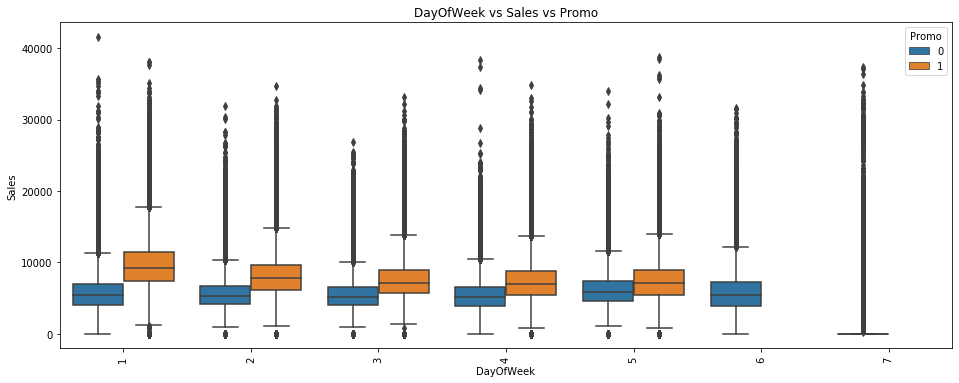

In [41]:
# Checking co-relation between Sales vs Days vs Promo

plt.figure(figsize=(16, 6))
sns.boxplot(x='DayOfWeek',y='Sales',hue='Promo',data=train)
plt.title("DayOfWeek vs Sales vs Promo")
plt.xticks(rotation = 90)
plt.show()

#### Promotion has a strong co-relation with sales of the stores.

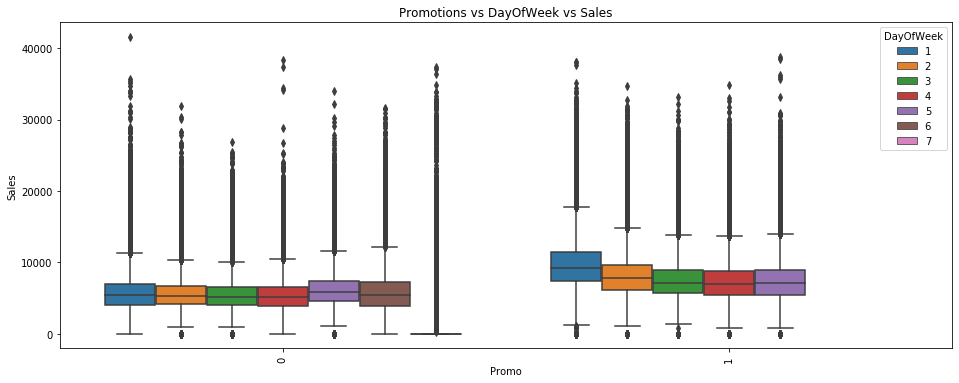

In [42]:
# Checking co-relation between Promo vs Days

plt.figure(figsize=(16, 6))
sns.boxplot(x='Promo',y='Sales',hue='DayOfWeek',data=train)
plt.title("Promotions vs DayOfWeek vs Sales")
plt.xticks(rotation = 90)
plt.show()

#### Days at the start of the week are higher Sales than sales of other days

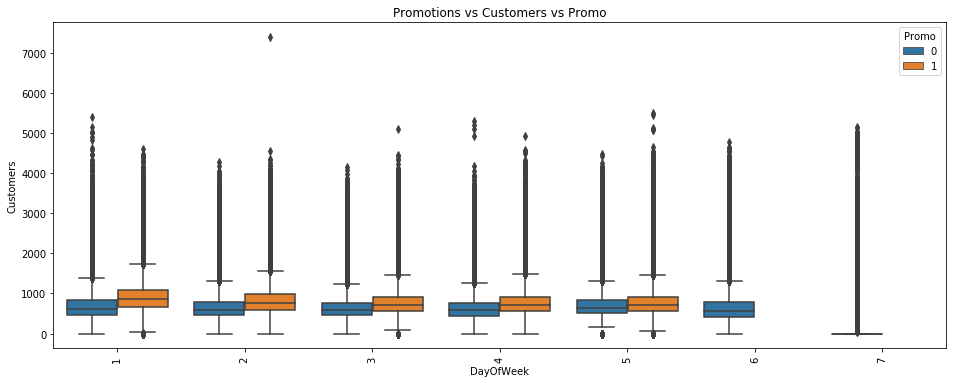

In [43]:
# Checking co-relation between Days vs Customers vs Promo 

plt.figure(figsize=(16, 6))
sns.boxplot(x='DayOfWeek',y='Customers',hue='Promo',data=train)
plt.title("Promotions vs Customers vs Promo")
plt.xticks(rotation = 90)
plt.show()

#### Customers are higher on weekdays and when promotios are active

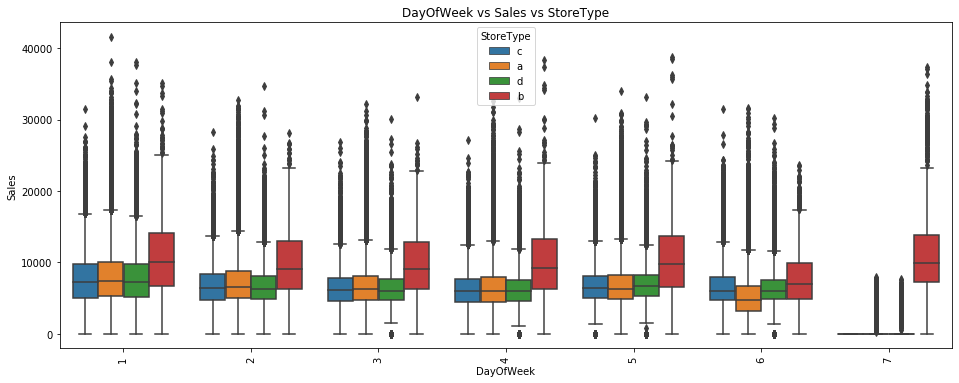

In [44]:
# Checking co-relation between Days vs Sales vs StoreType 

plt.figure(figsize=(16, 6))
sns.boxplot(x='DayOfWeek',y='Sales',hue='StoreType',data=train)
plt.title("DayOfWeek vs Sales vs StoreType")
plt.xticks(rotation = 90)
plt.show()

#### Sales for store type b is the highest among all days including day 7 where sales for other store type is almost zero. On day 6, the difference in sales among store type is marginally lower than other days

## For numerical variables

<Figure size 2880x2880 with 0 Axes>

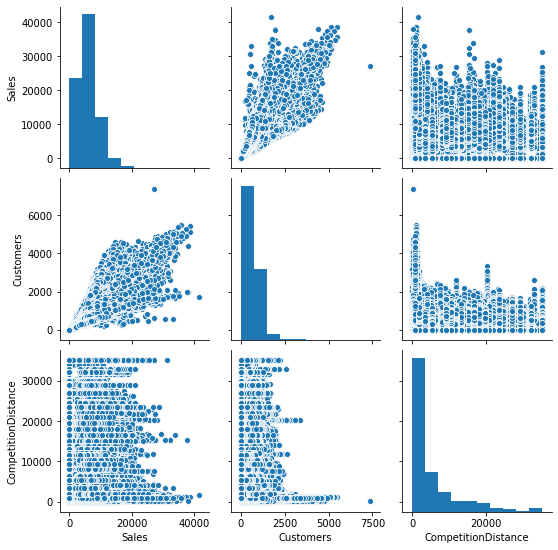

In [45]:
# Pairwise plot

plt.figure(figsize=(40, 40))
sns.pairplot(train[['Sales','Customers','CompetitionDistance']])
plt.show()

#### From the plot, we can see that as customers increase, sales also increases.

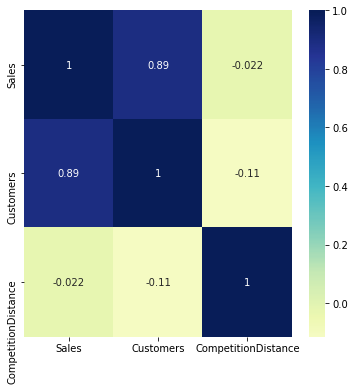

In [46]:
# Checking co-relation coefficients for numercial variables

# plot heat map for corr
cor = train[['Sales','Customers','CompetitionDistance']].corr()
plt.figure(figsize = (6, 6))
sns.heatmap(cor, annot = True,center=0.4,cmap="YlGnBu")
plt.show()

#### Sales and customer have a very strong co-relation with a factor of 0.89. For other variables, it is insignificant.

# Feature Engineering 

### Creating dummy variables

In [47]:
# Creating dummy variable for day of the week 

dummies=pd.get_dummies(train['DayOfWeek'],drop_first=True,prefix='DayOfWeek')
train=pd.concat([train,dummies],axis=1)

In [48]:
# Creating dummy variable for StoreType 

dummies=pd.get_dummies(train['StoreType'],drop_first=True,prefix='StoreType')
train=pd.concat([train,dummies],axis=1)

In [49]:
# Creating dummy variable for Assortment 

dummies=pd.get_dummies(train['Assortment'],drop_first=True,prefix='Assortment')
train=pd.concat([train,dummies],axis=1)

In [50]:
# Viewing data

train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0,0,1,0,0,0,1,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,0,1,0,0,0,0,1,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,1,0,0,0,0,0,1,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,0,0,0,0,0,0,1,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,0,0,0,0,0,0,1,0,0,0


In [51]:
# Dropping DayOfWeek, StoreType and Assortment

train.drop(['DayOfWeek','StoreType','Assortment'],axis=1,inplace=True)
train.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,2015-07-31,5263,555,1,1,0,1,1270.0,9.0,...,0,0,1,0,0,0,1,0,0,0
1,1,2015-07-30,5020,546,1,1,0,1,1270.0,9.0,...,0,1,0,0,0,0,1,0,0,0
2,1,2015-07-29,4782,523,1,1,0,1,1270.0,9.0,...,1,0,0,0,0,0,1,0,0,0
3,1,2015-07-28,5011,560,1,1,0,1,1270.0,9.0,...,0,0,0,0,0,0,1,0,0,0
4,1,2015-07-27,6102,612,1,1,0,1,1270.0,9.0,...,0,0,0,0,0,0,1,0,0,0


#### For competition data, we can merge their date information into a single column

In [52]:
train['CompetitionOpenSince'] = train.CompetitionOpenSinceYear.astype(int).astype(str) + '-' + train.CompetitionOpenSinceMonth.astype(int).astype(str) + '-01'
train.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,CompetitionOpenSince
0,1,2015-07-31,5263,555,1,1,0,1,1270.0,9.0,...,0,1,0,0,0,1,0,0,0,2008-9-01
1,1,2015-07-30,5020,546,1,1,0,1,1270.0,9.0,...,1,0,0,0,0,1,0,0,0,2008-9-01
2,1,2015-07-29,4782,523,1,1,0,1,1270.0,9.0,...,0,0,0,0,0,1,0,0,0,2008-9-01
3,1,2015-07-28,5011,560,1,1,0,1,1270.0,9.0,...,0,0,0,0,0,1,0,0,0,2008-9-01
4,1,2015-07-27,6102,612,1,1,0,1,1270.0,9.0,...,0,0,0,0,0,1,0,0,0,2008-9-01


In [53]:
# Dropping CompetitionOpenSinceMonth, CompetitionOpenSinceYear fields

train.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'],axis=1,inplace=True)

#### We had 351 stores where competion opening dates were not available, the dates for CompetitionOpenSince for those stores needs to be impute with null




In [54]:
train.loc[train.CompetitionOpenSince=='0-0-01','CompetitionOpenSince']

10362      0-0-01
10363      0-0-01
10364      0-0-01
10365      0-0-01
10366      0-0-01
            ...  
1017204    0-0-01
1017205    0-0-01
1017206    0-0-01
1017207    0-0-01
1017208    0-0-01
Name: CompetitionOpenSince, Length: 323348, dtype: object

In [55]:
#Imputing them with null

train.loc[train.CompetitionOpenSince=='0-0-01','CompetitionOpenSince']=np.nan

In [56]:
#Checking datatypes

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Store                 1017209 non-null  int64  
 1   Date                  1017209 non-null  object 
 2   Sales                 1017209 non-null  int64  
 3   Customers             1017209 non-null  int64  
 4   Open                  1017209 non-null  int64  
 5   Promo                 1017209 non-null  int64  
 6   StateHoliday          1017209 non-null  object 
 7   SchoolHoliday         1017209 non-null  int64  
 8   CompetitionDistance   1017209 non-null  float64
 9   Promo2                1017209 non-null  int64  
 10  Promo2SinceWeek       1017209 non-null  float64
 11  Promo2SinceYear       1017209 non-null  float64
 12  PromoInterval         1017209 non-null  object 
 13  DayOfWeek_2           1017209 non-null  uint8  
 14  DayOfWeek_3           1017209 non-

#### Date and CompetitionOpenSince are date objects, we need convert them into datetime objects

In [57]:
#Converting date field to datetime object

train['Date']=pd.to_datetime(train['Date'],errors='coerce')

In [58]:
#Converting CompetitionOpenSince field to datetime object

train['CompetitionOpenSince']=pd.to_datetime(train['CompetitionOpenSince'],errors='coerce')

In [59]:
#Checking data types again

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Store                 1017209 non-null  int64         
 1   Date                  1017209 non-null  datetime64[ns]
 2   Sales                 1017209 non-null  int64         
 3   Customers             1017209 non-null  int64         
 4   Open                  1017209 non-null  int64         
 5   Promo                 1017209 non-null  int64         
 6   StateHoliday          1017209 non-null  object        
 7   SchoolHoliday         1017209 non-null  int64         
 8   CompetitionDistance   1017209 non-null  float64       
 9   Promo2                1017209 non-null  int64         
 10  Promo2SinceWeek       1017209 non-null  float64       
 11  Promo2SinceYear       1017209 non-null  float64       
 12  PromoInterval         1017209 non-null  ob

#### There will be store transaction dates where sales were made before competition started and sales after competition. Let's create a new flag for their identification

In [60]:


def calculate_compitition(row):
    if row.CompetitionOpenSince>row.Date:
        return 1
    else:
        return 0
train['Before_Competition']=train[['CompetitionOpenSince','Date']].apply(calculate_compitition,axis=1)

In [61]:
train.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,...,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,CompetitionOpenSince,Before_Competition
0,1,2015-07-31,5263,555,1,1,0,1,1270.0,0,...,1,0,0,0,1,0,0,0,2008-09-01,0
1,1,2015-07-30,5020,546,1,1,0,1,1270.0,0,...,0,0,0,0,1,0,0,0,2008-09-01,0
2,1,2015-07-29,4782,523,1,1,0,1,1270.0,0,...,0,0,0,0,1,0,0,0,2008-09-01,0
3,1,2015-07-28,5011,560,1,1,0,1,1270.0,0,...,0,0,0,0,1,0,0,0,2008-09-01,0
4,1,2015-07-27,6102,612,1,1,0,1,1270.0,0,...,0,0,0,0,1,0,0,0,2008-09-01,0


In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 26 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Store                 1017209 non-null  int64         
 1   Date                  1017209 non-null  datetime64[ns]
 2   Sales                 1017209 non-null  int64         
 3   Customers             1017209 non-null  int64         
 4   Open                  1017209 non-null  int64         
 5   Promo                 1017209 non-null  int64         
 6   StateHoliday          1017209 non-null  object        
 7   SchoolHoliday         1017209 non-null  int64         
 8   CompetitionDistance   1017209 non-null  float64       
 9   Promo2                1017209 non-null  int64         
 10  Promo2SinceWeek       1017209 non-null  float64       
 11  Promo2SinceYear       1017209 non-null  float64       
 12  PromoInterval         1017209 non-null  ob

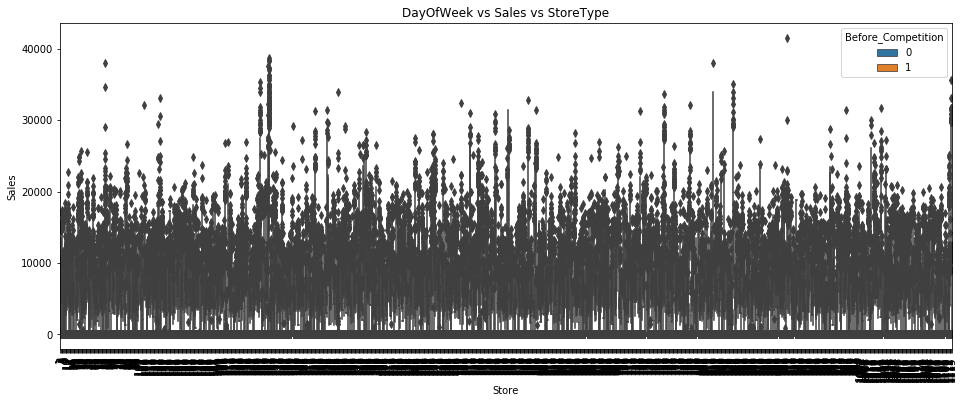

In [63]:
# Checking co-relation between StoreType vs Sales vs Before_Competition

plt.figure(figsize=(16, 6))
sns.boxplot(x='Store',y='Sales',hue='Before_Competition',data=train)
plt.title("DayOfWeek vs Sales vs StoreType")
plt.xticks(rotation = 90)
plt.show()

#### Sales of stores before and after competition do not have much difference, we can drop this field

In [64]:
train.drop(['Before_Competition'],inplace=True,axis=1)

#### We can also drop CompetitionOpenSince, since it is a field for derived Before_Competition

In [65]:
train.drop(['CompetitionOpenSince'],inplace=True,axis=1)

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 24 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   Date                 1017209 non-null  datetime64[ns]
 2   Sales                1017209 non-null  int64         
 3   Customers            1017209 non-null  int64         
 4   Open                 1017209 non-null  int64         
 5   Promo                1017209 non-null  int64         
 6   StateHoliday         1017209 non-null  object        
 7   SchoolHoliday        1017209 non-null  int64         
 8   CompetitionDistance  1017209 non-null  float64       
 9   Promo2               1017209 non-null  int64         
 10  Promo2SinceWeek      1017209 non-null  float64       
 11  Promo2SinceYear      1017209 non-null  float64       
 12  PromoInterval        1017209 non-null  object        
 1

#### We had seen earlier that Promo2 variables does not seem to have much impact on Sales, we can drop them

In [67]:
train.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,...,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,2015-07-31,5263,555,1,1,0,1,1270.0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,2015-07-30,5020,546,1,1,0,1,1270.0,0,...,0,1,0,0,0,0,1,0,0,0
2,1,2015-07-29,4782,523,1,1,0,1,1270.0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,2015-07-28,5011,560,1,1,0,1,1270.0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,2015-07-27,6102,612,1,1,0,1,1270.0,0,...,0,0,0,0,0,0,1,0,0,0


In [68]:
#### We have 

# Time Series Analysis 

### From our earlier analysis, we have seen that increase in Customers directly translates to increase in Sales meaning customer counts are an endogenous variable for our predictions

In [69]:
#Setting date as index

train_df=train.set_index('Date')
train_df.head()

,Store,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,Promo2SinceWeek,...,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5263,555,1,1,0,1,1270.0,0,0.0,...,0,0,1,0,0,0,1,0,0,0
2015-07-30,1,5020,546,1,1,0,1,1270.0,0,0.0,...,0,1,0,0,0,0,1,0,0,0
2015-07-29,1,4782,523,1,1,0,1,1270.0,0,0.0,...,1,0,0,0,0,0,1,0,0,0
2015-07-28,1,5011,560,1,1,0,1,1270.0,0,0.0,...,0,0,0,0,0,0,1,0,0,0
2015-07-27,1,6102,612,1,1,0,1,1270.0,0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [70]:
# Grouping the data at a date level for analysis

train_df_all=train_df.groupby('Date').agg({'Sales': 'mean',
                                           'Customers':'mean', 
                                           'Promo': 'sum',
                                           'Promo2': 'sum',
                                           'SchoolHoliday':'sum',
                                           'DayOfWeek_2':'mean',
                                           'DayOfWeek_3':'mean',
                                           'DayOfWeek_4':'mean',
                                           'DayOfWeek_5':'mean',
                                           'DayOfWeek_6':'mean',
                                           'DayOfWeek_7':'mean'})
train_df_all.head()

,Sales,Customers,Promo,Promo2,SchoolHoliday,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
Date,,,,,,,,,,,
2013-01-01,87.284560,17.496409,0,571,1114,1,0,0,0,0,0
2013-01-02,6233.030493,748.049327,0,571,1115,0,1,0,0,0,0
2013-01-03,5693.112108,682.547085,0,571,1040,0,0,1,0,0,0
2013-01-04,5954.218834,701.468161,0,571,1040,0,0,0,1,0,0
2013-01-05,5337.751570,616.566816,0,571,112,0,0,0,0,1,0


#### Creating a function for time series plots

In [71]:
def timeseries_plot(series,c):
    fig = plt.figure(figsize=(20, 3))
    series.plot()
    plt.xlabel('Date')
    plt.ylabel(c)
    plt.title('For {}'.format(c))
    plt.show()

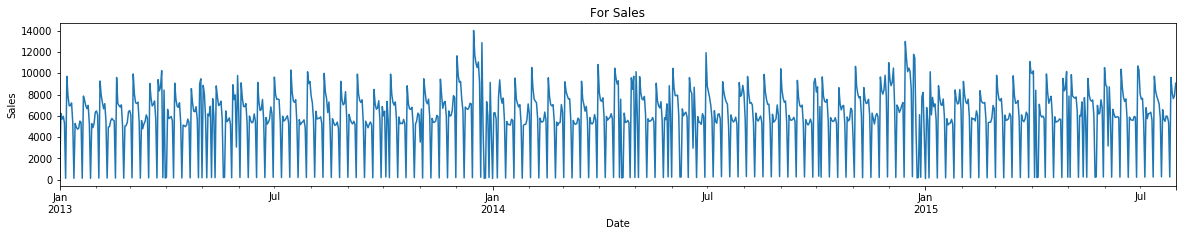

In [72]:
# Plotting time series chart for Sales

timeseries_plot(train_df_all['Sales'],'Sales')

#### Creating function for seasonal decomposition

In [73]:


def plot_seasonal_decomposition(series,c,model):
    rcParams['figure.figsize'] = 18, 14
    decomposition = sm.tsa.seasonal_decompose(series, model=model) # additive seasonal index
    fig = decomposition.plot()
    plt.show()
    print('Mean Residual for {}={}'.format(c,decomposition.resid.mean()))


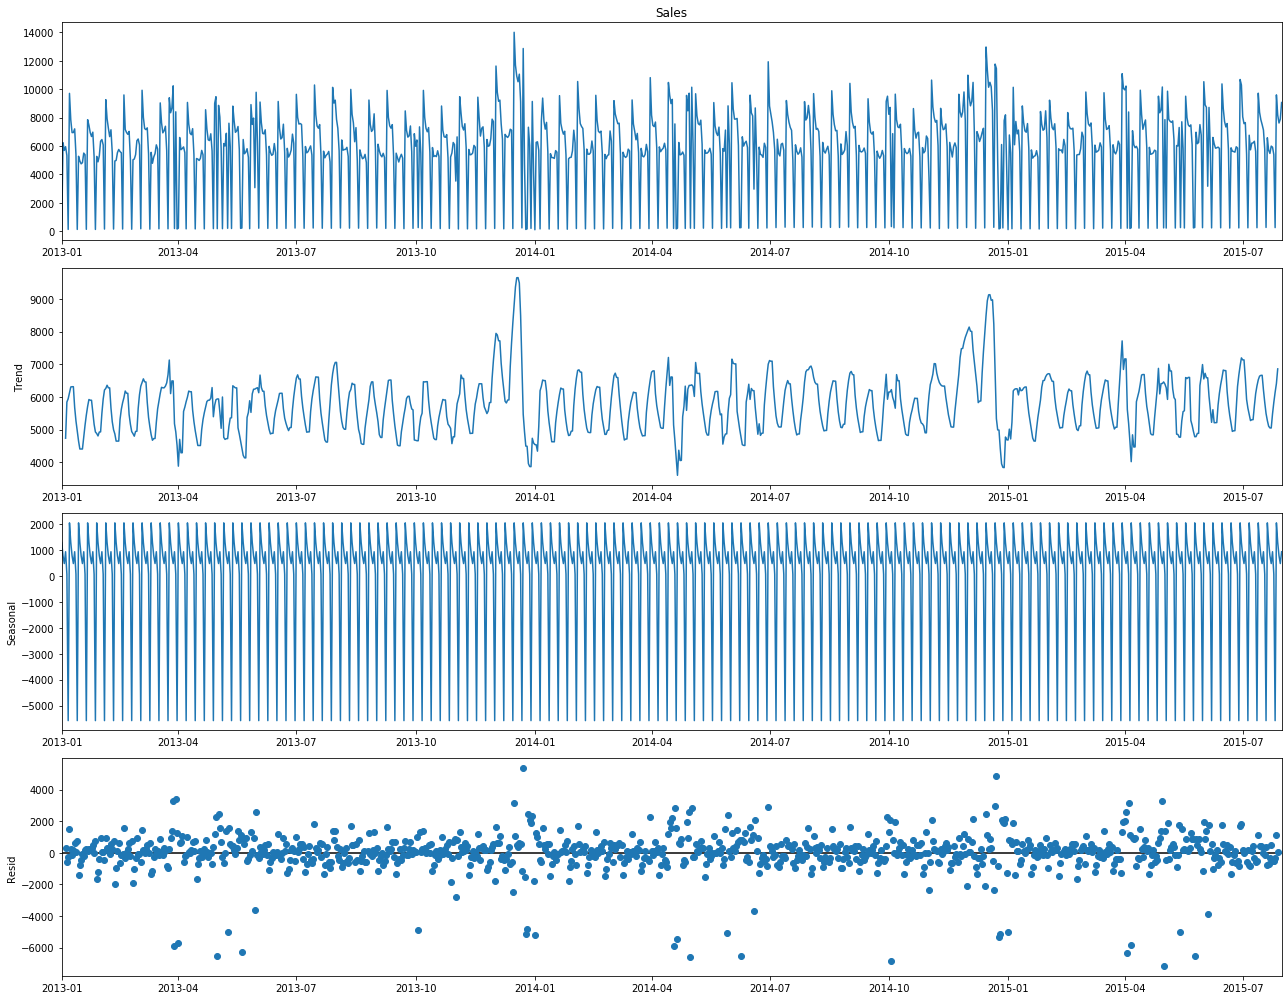

Mean Residual for Sales=0.6202792140320815


In [74]:
plot_seasonal_decomposition(train_df_all['Sales'],'Sales','additive')

# Casualty testing

#### We have seen that Sales and Customers have a high co-relation. Let's check their casuality

In [75]:
from statsmodels.tsa.stattools import grangercausalitytests

causality_sales=grangercausalitytests(train_df_all[['Sales','Customers']].dropna(), 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=207.3179, p=0.0000  , df_denom=938, df_num=1
ssr based chi2 test:   chi2=207.9810, p=0.0000  , df=1
likelihood ratio test: chi2=187.9060, p=0.0000  , df=1
parameter F test:         F=207.3179, p=0.0000  , df_denom=938, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=117.7859, p=0.0000  , df_denom=935, df_num=2
ssr based chi2 test:   chi2=236.8316, p=0.0000  , df=2
likelihood ratio test: chi2=211.2191, p=0.0000  , df=2
parameter F test:         F=117.7859, p=0.0000  , df_denom=935, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=84.6075 , p=0.0000  , df_denom=932, df_num=3
ssr based chi2 test:   chi2=255.7290, p=0.0000  , df=3
likelihood ratio test: chi2=226.1668, p=0.0000  , df=3
parameter F test:         F=84.6075 , p=0.0000  , df_denom=932, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=70.9777 , p=0.0000  

#### The test indicates casuality between Sales and customers

# Stationary test

#### Creating a function for testing stationary using ADF statistic

In [76]:
from statsmodels.tsa.stattools import adfuller

def stationary_test(df):
    for c in df.columns:
        print('For ',c)
        print('*'*100)
        r=adfuller(df[c],autolag='AIC')
        print('ADF Statistic=',r[0])
        print('P value=',r[1])
        output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
        p_value = output['pvalue']
        if p_value <= 0.05:
            print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
            print(f" => Series is Stationary.")
        else:
            print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
            print(f" => Series is Non-Stationary.")  

In [77]:
stationary_test(train_df_all[['Sales','Customers']])

For  Sales
****************************************************************************************************
ADF Statistic= -5.650822837207895
P value= 9.870006549262069e-07
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.
For  Customers
****************************************************************************************************
ADF Statistic= -5.933710149589037
P value= 2.3477735379185968e-07
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


#### The p-values for both the variables is less than 0.05. We can reject the null hypothesis. The series is stationary

#### In the dataset, we do not have any other variable which is linearly related to Sales. They do not seem to be time series inputs for our analysis.

## We had earlier determined that since increase in customers relate to increased sales and since no other variable is a time series, we will consider them to be exogenous. 

# Autocorelation

#### Creating functions for ACF and PACF plots

In [78]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

def plot_acf_pacf(series,c):
    fig,ax = plt.subplots(figsize=(20, 3))
    fig.add_subplot(2,1,1)
    plot_acf(series, lags = 75)
    plt.title('ACF for {}'.format(c)) 
    fig.add_subplot(2,1,2)
    plot_pacf(series, lags = 75)
    plt.title('PACF for {}'.format(c)) 
    plt.show()

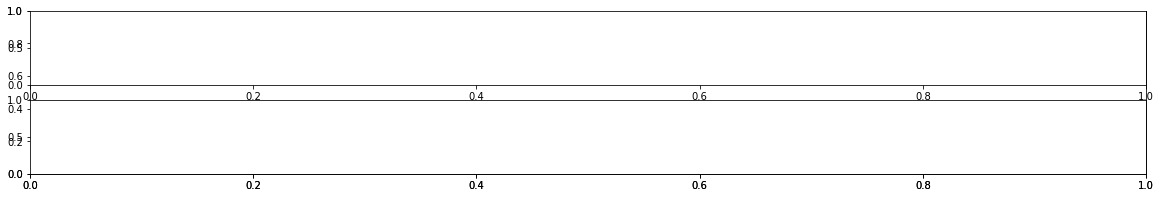

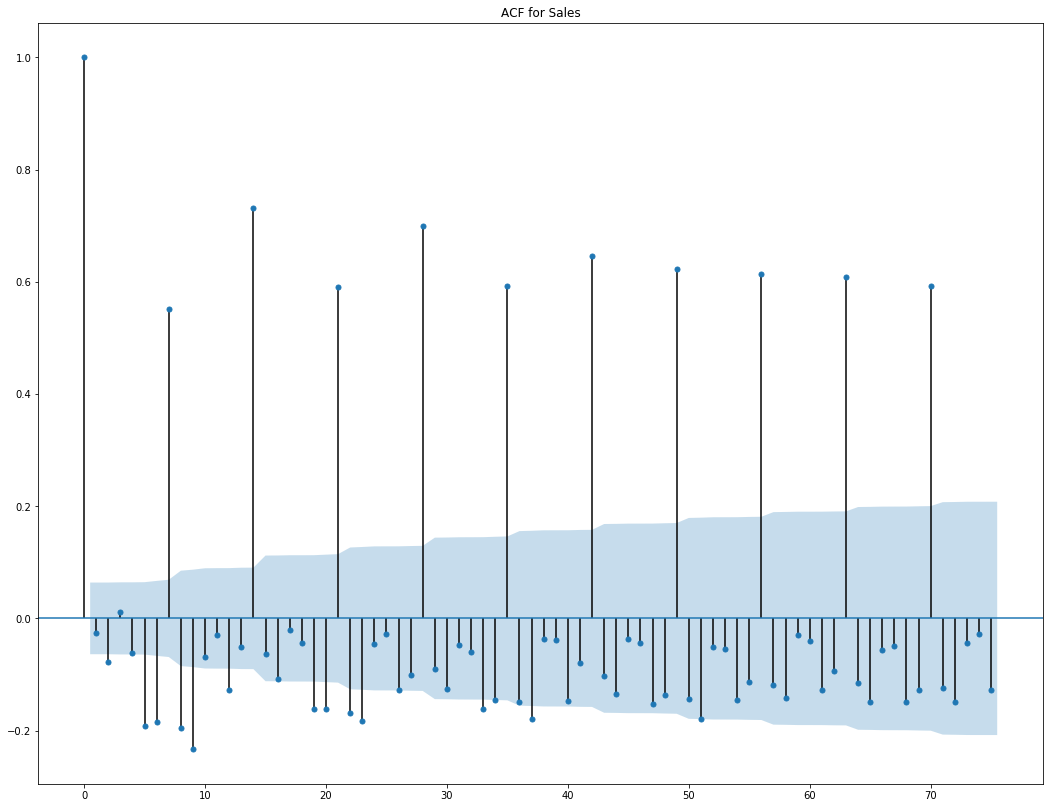

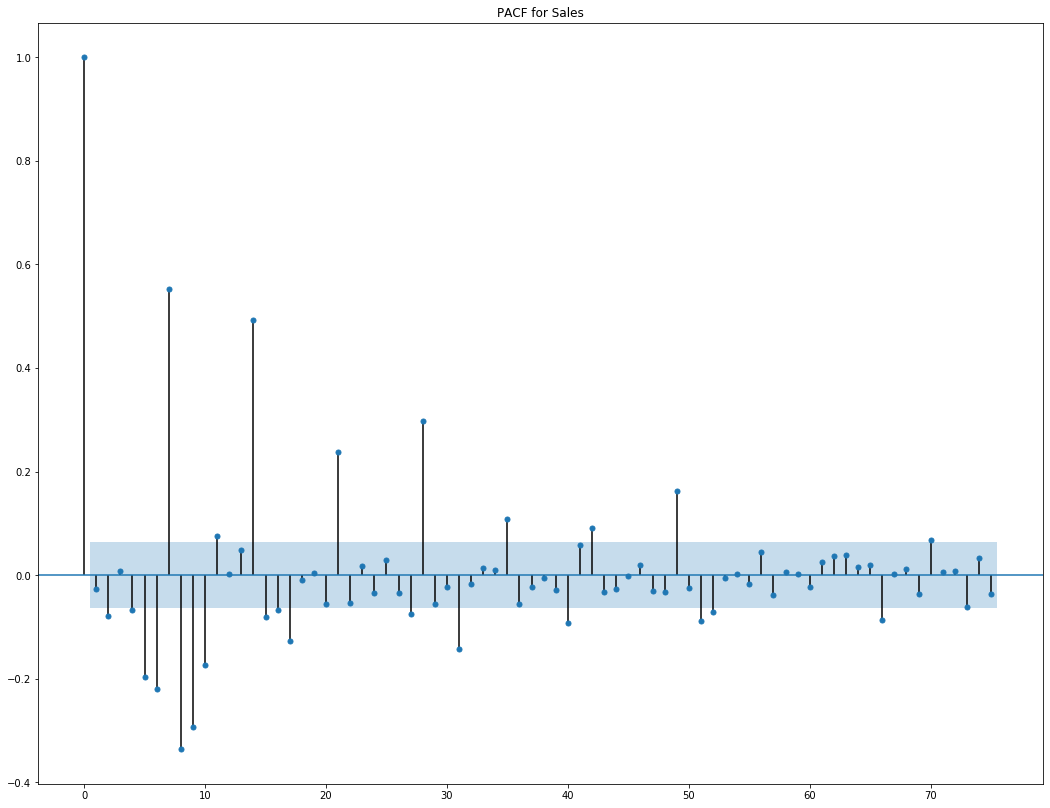

In [79]:
#Plotting ACF and PACF for sales

plot_acf_pacf(train_df_all['Sales'],'Sales')

#### For ACF, we set q=0 as co-realation never comes dowm. For PACF, we set q=7, since it is the highest lag since inception.

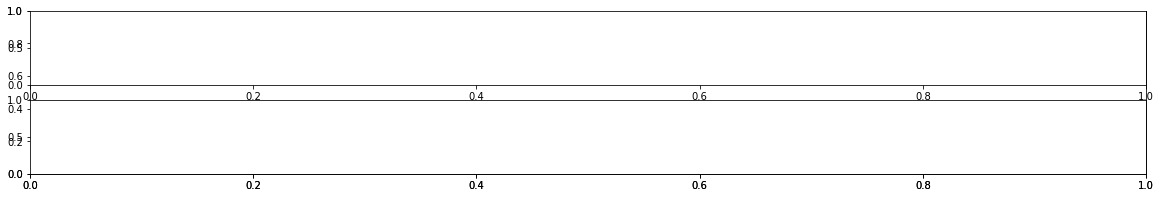

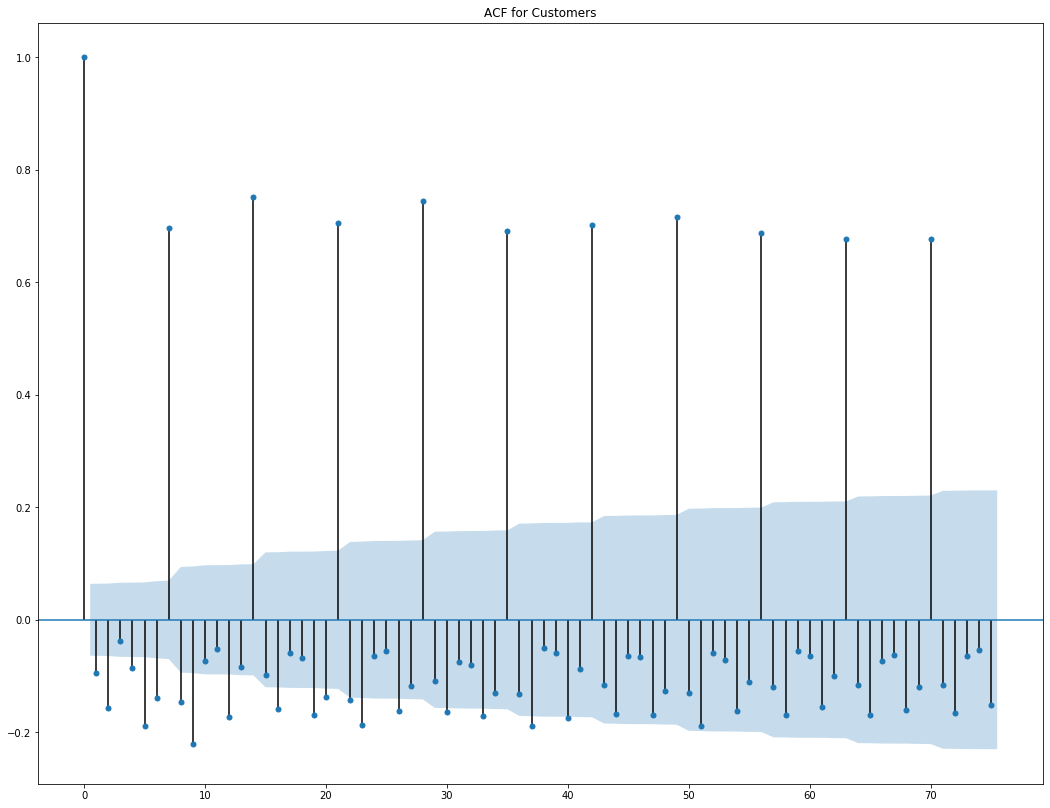

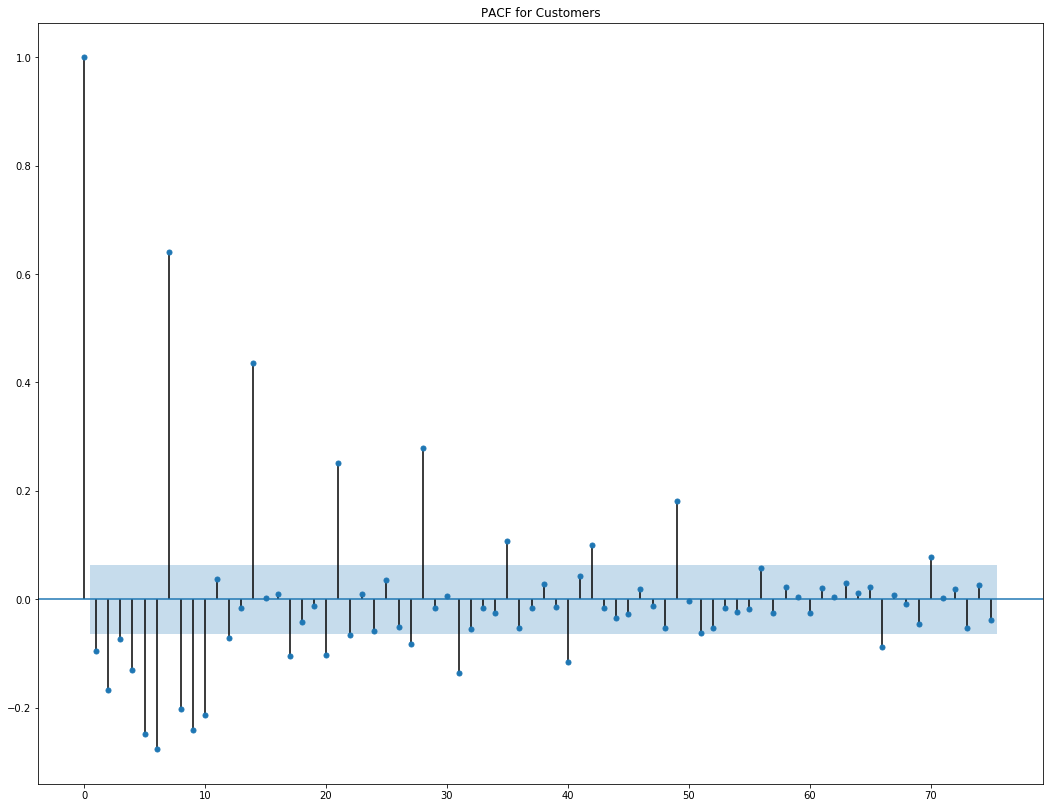

In [80]:
#Plotting ACF and PACF for Customers

plot_acf_pacf(train_df_all['Customers'],'Customers')

#### For ACF, we set q=0 as co-realation never comes dowm. For PACF, we set p=7, since it is the highest lag since inception.

# Train - Test Split

### We need to predict sales for the next 6 weeks i.e 42 days. So, we keep 42 days for test and remaining for training.

In [81]:
train_df_all.shape

(942, 11)

#### We will use first 900 rows for train and last 42 for test

In [82]:
#Creating train and test splits

train_len=900
train_df_all_train=train_df_all.iloc[:train_len,:]
train_df_all_test=train_df_all.iloc[train_len:,:]

## Standardising numerical values in test-train datasets using minmax

In [83]:
from sklearn.preprocessing import MinMaxScaler


# Fit transform on train data

scaler = MinMaxScaler()
train_df_all_train[['Sales','Customers','Promo','Promo2','SchoolHoliday']]=scaler.fit_transform(train_df_all_train[['Sales','Customers','Promo2','SchoolHoliday','Promo']])
train_df_all_train.head()

,Sales,Customers,Promo,Promo2,SchoolHoliday,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
Date,,,,,,,,,,,
2013-01-01,0.000000,0.000000,1.0,0.999103,0.0,1,0,0,0,0,0
2013-01-02,0.441350,0.543373,1.0,1.000000,0.0,0,1,0,0,0,0
2013-01-03,0.402577,0.494654,1.0,0.932735,0.0,0,0,1,0,0,0
2013-01-04,0.421328,0.508727,1.0,0.932735,0.0,0,0,0,1,0,0
2013-01-05,0.377057,0.445579,1.0,0.100448,0.0,0,0,0,0,1,0


In [84]:
#Transform on test data

train_df_all_test[['Sales','Customers','Promo2','SchoolHoliday','Promo']]=scaler.transform(train_df_all_test[['Sales','Customers','Promo2','SchoolHoliday','Promo']])
train_df_all_test.head()

,Sales,Customers,Promo,Promo2,SchoolHoliday,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
Date,,,,,,,,,,,
2015-06-20,0.405336,0.453472,0.0,1.0,0.0,0,0,0,0,1,0
2015-06-21,0.009824,0.015096,0.0,1.0,0.0,0,0,0,0,0,1
2015-06-22,0.415762,0.489576,0.0,1.0,0.0,0,0,0,0,0,0
2015-06-23,0.399006,0.475851,0.0,1.0,0.0,1,0,0,0,0,0
2015-06-24,0.396755,0.474848,0.0,1.0,0.0,0,1,0,0,0,0


# VAR [Vector AutoRegressive Model]

In [85]:
exog = train_df_all_train[['Promo','Promo2','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
endog = train_df_all_train[['Sales', 'Customers']].astype(float)
var_model = sm.tsa.VAR(endog,exog)
res=var_model.select_order(maxlags=15)
print(res.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -12.17      -12.06   5.186e-06      -12.13
1       -12.29      -12.16   4.588e-06      -12.24
2       -12.29      -12.14   4.580e-06      -12.24
3       -12.33      -12.16   4.415e-06      -12.26
4       -12.34      -12.14   4.378e-06      -12.26
5       -12.34      -12.13   4.362e-06      -12.26
6       -12.35      -12.11   4.343e-06      -12.26
7       -12.35      -12.09   4.338e-06      -12.25
8       -12.50      -12.22   3.736e-06      -12.39
9       -12.53     -12.23*   3.618e-06      -12.41
10      -12.54      -12.22   3.576e-06      -12.42
11      -12.56      -12.21   3.527e-06      -12.42
12      -12.55      -12.18   3.550e-06      -12.41
13      -12.55      -12.17   3.528e-06      -12.41
14      -12.60      -12.19   3.373e-06     -12.44*
15     -12.61*      -12.17  3.350e-06*      -12.44
-------------------------------

#### AIC is the lowest at lag 11.

In [86]:
#Fitting the model with lag 11

var_model_final = var_model.fit(11)
var_model_final.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 21, Apr, 2024
Time:                     13:10:14
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -12.2151
Nobs:                     889.000    HQIC:                  -12.4282
Log likelihood:           3124.04    FPE:                3.50992e-06
AIC:                     -12.5600    Det(Omega_mle):     3.27025e-06
--------------------------------------------------------------------
Results for equation Sales
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.478303         0.066376            7.206           0.000
Promo                -0.036477         0.008951           -4.075           0.000
Promo2               -0.041718         0.012746           -3

#### Perform Johassen test with p=10

# Cointegration test

#### Creating function for johassen test for checking cointegration

In [87]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.vecm import select_coint_rank

def cointegration_test(df, lag): 
    alpha=0.05
    out = coint_johansen(df,-1,lag)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [88]:
train_df_all['Sales']=train_df_all['Sales'].apply(lambda x:round(x))
train_df_all['Customers']=train_df_all['Customers'].apply(lambda x:round(x))

In [89]:
cointegration_test(train_df_all[['Sales','Customers']],10)
rank_result=select_coint_rank(train_df_all[['Sales','Customers']],-1,10)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Sales  ::  127.93    > 12.3212   =>   True
Customers ::  6.57      > 4.1296    =>   True


print(rank_result.rank)

#### We have the rank of Johassen test as 2 which means that the time series are stationary but do not seem to be co-integratied

In [90]:
# Getting lag order

lag_order = var_model_final.k_ar
print(lag_order) 
forecast_input = train_df_all_train[['Sales','Customers']].values[-lag_order:]
forecast_input

11


array([[0.43595062, 0.50832754],
       [0.41397174, 0.4892133 ],
       [0.41579704, 0.49799996],
       [0.41923316, 0.49742961],
       [0.41303913, 0.45743139],
       [0.0110916 , 0.01718541],
       [0.73892895, 0.69369782],
       [0.61440719, 0.61305964],
       [0.54882338, 0.56709914],
       [0.5213138 , 0.5473912 ],
       [0.53850368, 0.5678536 ]])

## Forecasting using VAR

In [91]:
exog_test = train_df_all_test[['Promo','Promo2','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
fc = var_model_final.forecast(y=forecast_input, steps=42,exog_future=exog_test)
var_forecast = pd.DataFrame(fc, index=train_df_all_test.index, columns=['Sales','Customers'])
var_forecast

,Sales,Customers
Date,,
2015-06-20,0.431773,0.486732
2015-06-21,0.010798,0.003122
2015-06-22,0.426806,0.502533
2015-06-23,0.414984,0.501199
2015-06-24,0.377982,0.456883
2015-06-25,0.344227,0.421640
2015-06-26,0.432635,0.507980
2015-06-27,0.414658,0.463401
2015-06-28,0.016841,0.007853


In [92]:
#Adding forecasted values

train_df_all_test['VarForecastedSales']=var_forecast.Sales
train_df_all_test['VarForecastedCustomers']=var_forecast.Customers

#### Creating a function for results visualization

In [93]:


def forecasted_timeseries_visualization(series,forecasted_series,c,model):
    fig = plt.figure(figsize=(20, 3))
    series.plot(label='Actual')
    forecasted_series.plot(label='Forecasted')
    plt.xlabel('Date')
    plt.ylabel(c)
    plt.legend(loc='best')
    plt.title('{} model For {}'.format(model,c))
    plt.show()

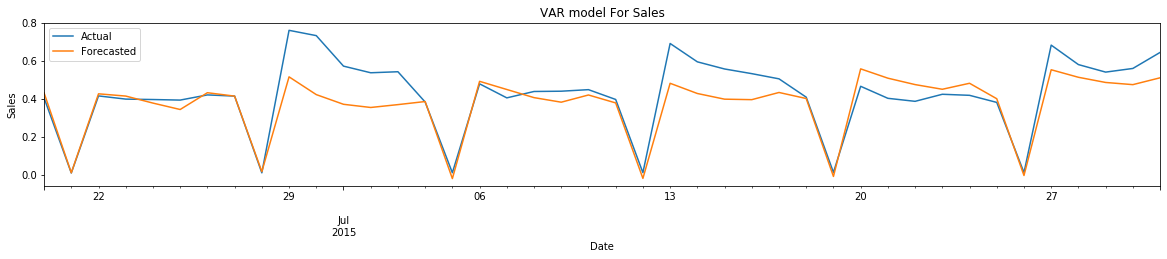

In [94]:
forecasted_timeseries_visualization(train_df_all_test['Sales'],train_df_all_test['VarForecastedSales'],'Sales','VAR')

#### Storing results in a dataframe

In [95]:
from sklearn.metrics import mean_squared_error
summary_df=pd.DataFrame(columns=['Store','Model','RMSE_SALES','MAPE_SALES','RMSE_CUSTOMERS','MAPE_CUSTOMERS'])

def summary(s,fs,c,fc,store,model):
    rmse_sales = np.sqrt(mean_squared_error(s, fs)).round(2)
    mape_sales = np.round(np.mean(np.abs(s-fs)/s)*100,2)
    rmse_customers = np.sqrt(mean_squared_error(c, fc)).round(2)
    mape_customers = np.round(np.mean(np.abs(c-fc)/c)*100,2)
    temp=pd.DataFrame({'Store':[store],'Model':[model], 'RMSE_SALES': [rmse_sales],'MAPE_SALES': [mape_sales] , 
                            'RMSE_CUSTOMERS': [rmse_customers],'MAPE_CUSTOMERS': [mape_customers]})
    return temp

In [96]:
d=summary(train_df_all_test['Sales'], train_df_all_test['VarForecastedSales'],
       train_df_all_test['Customers'], train_df_all_test['VarForecastedCustomers'],'All','VAR')
summary_df = pd.concat([summary_df, d])
summary_df.head()

,Store,Model,RMSE_SALES,MAPE_SALES,RMSE_CUSTOMERS,MAPE_CUSTOMERS
0,All,VAR,0.11,34.61,0.07,24.38


## Forecasting using VARMAX

#### We had used q=0 and p=6 for VAR

In [97]:
#modelling

exog = train_df_all_train[['Promo','Promo2','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
endog = train_df_all_train[['Sales', 'Customers']].astype(float)
varmax_model = sm.tsa.VARMAX(endog, order=(7,0),  exog=exog)
varmax_model_fit = varmax_model.fit(maxiter=1000, disp=False)
print(varmax_model_fit.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                            VARX(7)   Log Likelihood                3037.896
                              + intercept   AIC                          -5973.793
Date:                    Sun, 21 Apr 2024   BIC                          -5728.870
Time:                            13:17:38   HQIC                         -5880.231
Sample:                        01-01-2013                                         
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):               85.54, 495.67   Jarque-Bera (JB):     5680.99, 1886.75
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.60, 1.45   Skew:                     -1.68, -1.52
P

In [98]:
#forecasting on test data




exog_test = train_df_all_test[['Promo','Promo2','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
endog_test= train_df_all_test[['Sales','Customers']]
varmax_fc = varmax_model_fit.predict(start=train_df_all_test.index.min(),end=train_df_all_test.index.max(),exog=exog_test)
varmax_forecast_order6 = pd.DataFrame(varmax_fc, index=train_df_all_test.index, columns=['Sales','Customers'])
varmax_forecast_order6.head()

,Sales,Customers
Date,,
2015-06-20,0.444879,0.496662
2015-06-21,0.016028,0.001765
2015-06-22,0.482582,0.535093
2015-06-23,0.423681,0.503498
2015-06-24,0.374954,0.460159


In [99]:
#Adding forecasted values

train_df_all_test['VarmaxForecastedSalesOrder6']=varmax_forecast_order6.Sales
train_df_all_test['VarmaxForecastedCustomersOrder6']=varmax_forecast_order6.Customers

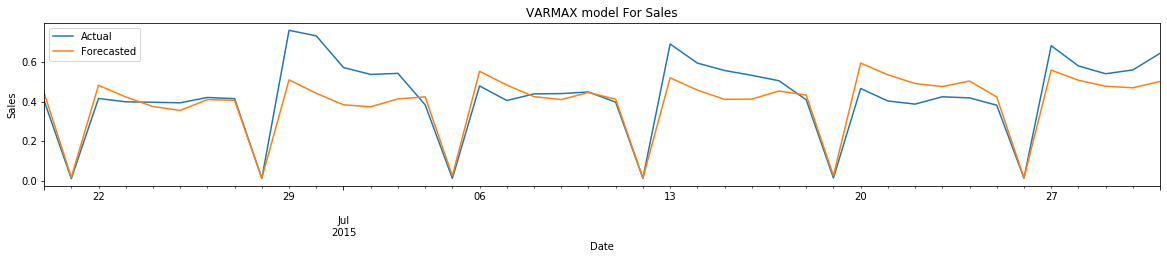

In [100]:
#Plotting time series

forecasted_timeseries_visualization(train_df_all_test['Sales'],train_df_all_test['VarmaxForecastedSalesOrder6'],'Sales','VARMAX')

#### We had used q=0 and p=7 for VAR

In [102]:
#modelling

exog = train_df_all_train[['Promo','Promo2','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
endog = train_df_all_train[['Sales', 'Customers']].astype(float)
varmax_model = sm.tsa.VARMAX(endog, order=(7,0),  exog=exog)
varmax_model_fit = varmax_model.fit(maxiter=1000, disp=False)
print(varmax_model_fit.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                            VARX(7)   Log Likelihood                3037.792
                              + intercept   AIC                          -5973.584
Date:                    Sun, 21 Apr 2024   BIC                          -5728.662
Time:                            13:24:38   HQIC                         -5880.022
Sample:                        01-01-2013                                         
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):               83.06, 498.53   Jarque-Bera (JB):     5714.69, 1909.68
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.59, 1.48   Skew:                     -1.72, -1.52
P

In [103]:
#forecasting on test data




exog_test = train_df_all_test[['Promo','Promo2','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
endog_test= train_df_all_test[['Sales','Customers']]
varmax_fc = varmax_model_fit.predict(start=train_df_all_test.index.min(),end=train_df_all_test.index.max(),exog=exog_test)
varmax_forecast = pd.DataFrame(varmax_fc, index=train_df_all_test.index, columns=['Sales','Customers'])
varmax_forecast.head()

,Sales,Customers
Date,,
2015-06-20,0.445651,0.499875
2015-06-21,0.018214,0.006106
2015-06-22,0.481248,0.535759
2015-06-23,0.422612,0.503687
2015-06-24,0.373612,0.459261


In [104]:
#Adding forecasted values

train_df_all_test['VarmaxForecastedSalesOrder7']=varmax_forecast.Sales
train_df_all_test['VarmaxForecastedCustomersOrder7']=varmax_forecast.Customers

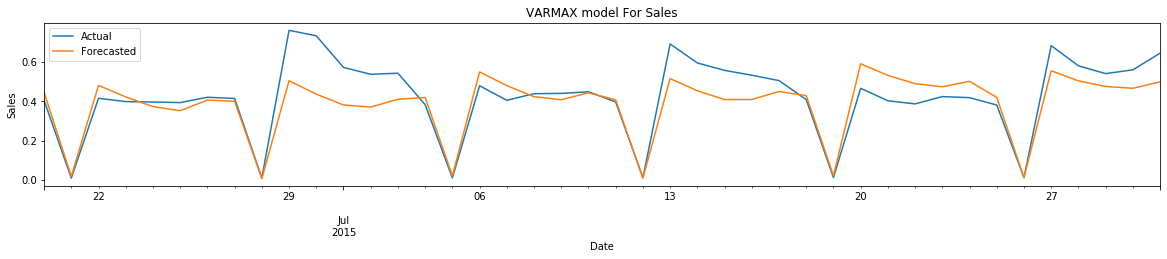

In [105]:
#Plotting time series

forecasted_timeseries_visualization(train_df_all_test['Sales'],train_df_all_test['VarmaxForecastedSalesOrder7'],'Sales','VARMAX')

In [107]:
#Printing results

d=summary(train_df_all_test['Sales'],train_df_all_test['VarmaxForecastedSalesOrder6'],
       train_df_all_test['Customers'], train_df_all_test['VarmaxForecastedCustomersOrder6'],'All','VARMAX_Order6')
e=summary(train_df_all_test['Sales'],train_df_all_test['VarmaxForecastedSalesOrder7'],
       train_df_all_test['Customers'], train_df_all_test['VarmaxForecastedCustomersOrder7'],'All','VARMAX_Order7')
summary_df = pd.concat([summary_df, d,e])
summary_df.head()


,Store,Model,RMSE_SALES,MAPE_SALES,RMSE_CUSTOMERS,MAPE_CUSTOMERS
0,All,VAR,0.11,34.61,0.07,24.38
0,All,VARMAX_Order6,0.10,21.27,0.07,18.22
0,All,VARMAX_Order7,0.10,21.24,0.07,17.31
